In [ ]:
!pip install seaborn folium --quiet

#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [ ]:
df = pd.read_csv('/content/synthetic_us_accidents.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(df)

ID          City State  Severity Weather_Condition Road_Condition  \
0         1      Columbus    FL         4              Snow          Snowy   
1         2      New York    IL         4             Clear          Snowy   
2         3       Atlanta    FL         1               Fog            Dry   
3         4       Chicago    MI         1               Fog          Snowy   
4         5      Columbus    OH         1            Cloudy            Dry   
5         6       Detroit    CA         2              Snow          Snowy   
6         7         Miami    NC         2              Rain            Dry   
7         8      Columbus    NC         4            Cloudy            Dry   
8         9       Atlanta    IL         1               Fog            Wet   
9        10       Chicago    NC         2             Clear            Dry   
10       11      New York    MI         1               Fog            Wet   
11       12       Atlanta    PA         4               Fog            Icy   
12       13       Atlanta    IL         4             Clear            Dry   
13       14         Miami    FL         3              Snow            Dry   
14       15  Philadelphia    GA         2              Snow            Wet   
15       16       Chicago    NY         1               Fog            Dry   
16       17       Houston    MI         2            Cloudy          Snowy   
17       18       Atlanta    FL         2              Rain            Wet   
18       19  Philadelphia    PA         3            Cloudy            Wet   
19       20       Houston    GA         2             Storm          Snowy   
20       21       Chicago    NC         2            Cloudy            Dry   
21       22   Los Angeles    PA         2               Fog            Icy   
22       23       Detroit    IL         2               Fog            Icy   
23       24  Philadelphia    TX         2              Rain            Icy   
24       25     Charlotte    TX         2              Rain            Wet   
25       26   Los Angeles    NC         1              Rain            Wet   
26       27       Detroit    TX         2               Fog          Snowy   
27       28         Miami    TX         4               Fog            Dry   
28       29      Columbus    FL         2            Cloudy          Snowy   
29       30      New York    FL         2               Fog            Wet   
30       31     Charlotte    NY         1             Storm            Icy   
31       32         Miami    OH         3              Snow            Dry   
32       33       Chicago    NC         3              Snow            Icy   
33       34         Miami    TX         2              Rain            Dry   
34       35      Columbus    NY         2               Fog            Icy   
35       36       Chicago    NC         4             Storm            Dry   
36       37     Charlotte    TX         3              Snow            Icy   
37       38      Columbus    MI         2            Cloudy          Snowy   
38       39       Houston    CA         2             Clear            Wet   
39       40      New York    MI         2            Cloudy          Snowy   
40       41     Charlotte    GA         3             Clear            Icy   
41       42       Houston    NC         2             Storm            Dry   
42       43       Detroit    OH         2            Cloudy          Snowy   
43       44     Charlotte    GA         1              Snow            Icy   
44       45       Detroit    NY         2               Fog            Wet   
45       46       Chicago    NY         3             Clear            Dry   
46       47       Houston    TX         4               Fog          Snowy   
47       48      New York    GA         1             Storm            Wet   
48       49      Columbus    TX         3               Fog            Icy   
49       50       Atlanta    NC         2              Snow            Dry   
50       51         Miami    NY

In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 10000 non-null  int64  
 1   City               10000 non-null  object 
 2   State              10000 non-null  object 
 3   Severity           10000 non-null  int64  
 4   Weather_Condition  10000 non-null  object 
 5   Road_Condition     10000 non-null  object 
 6   Hour               10000 non-null  int64  
 7   Latitude           10000 non-null  float64
 8   Longitude          10000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 703.3+ KB


ID                   0
City                 0
State                0
Severity             0
Weather_Condition    0
Road_Condition       0
Hour                 0
Latitude             0
Longitude            0
dtype: int64

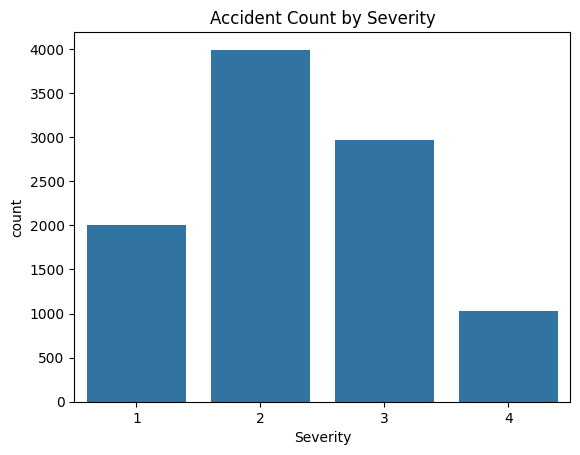

In [ ]:
sns.countplot(data=df, x='Severity')
plt.title('Accident Count by Severity')
plt.show()

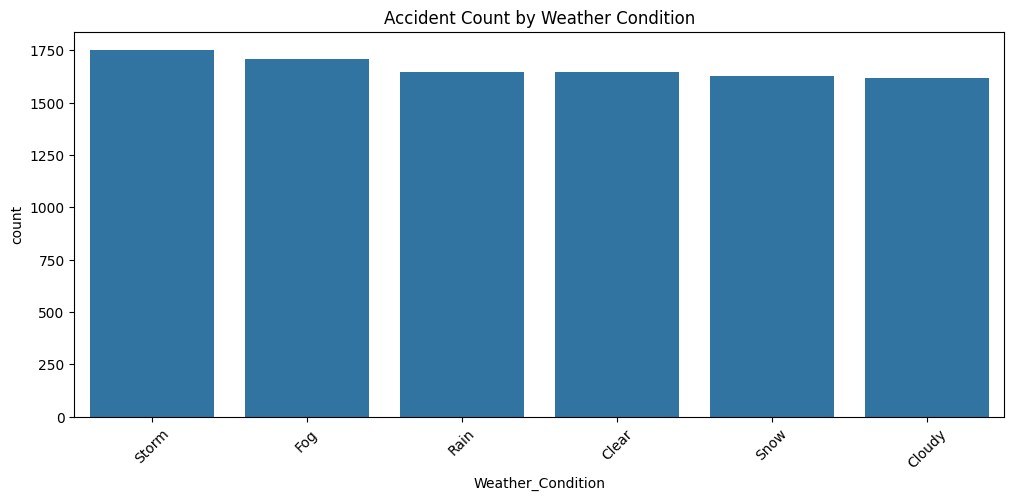

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Weather_Condition', order=df['Weather_Condition'].value_counts().index)
plt.title('Accident Count by Weather Condition')
plt.xticks(rotation=45)
plt.show()

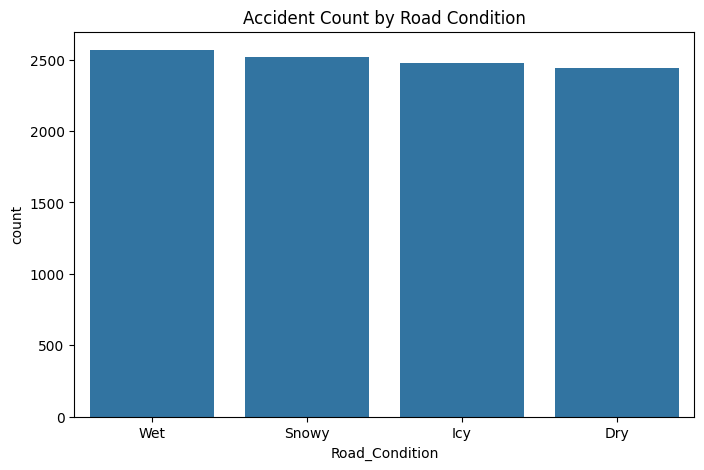

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Road_Condition', order=df['Road_Condition'].value_counts().index)
plt.title('Accident Count by Road Condition')
plt.show()

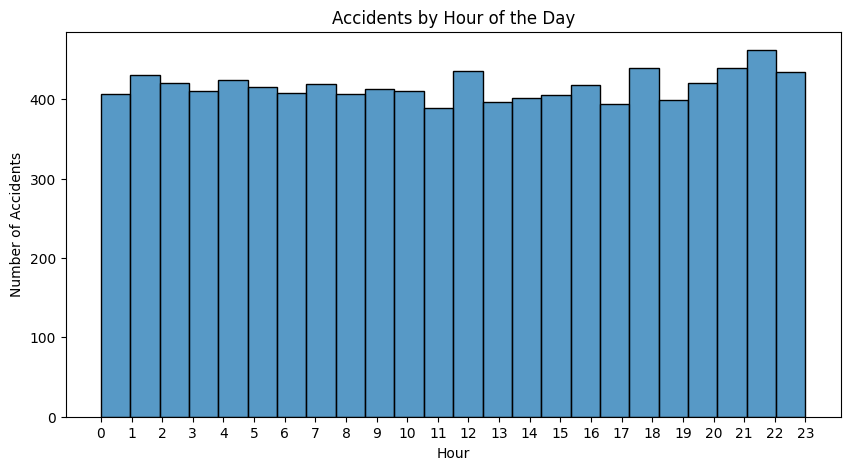

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=24, kde=False)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))
plt.show()

In [ ]:
#Heatmap of Accident Hotspots (Map View)
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=4)

for _, row in df.sample(500).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.4
    ).add_to(accident_map)

accident_map